1 ] 지도학습
- 의사결정나무: CART, C5.0, C4.5, CHAID, 분리기준 (카이제곱통계량 p값, 지니 지수, 엔트로피 지수, F통계량, 분산의 감소량), 가지치기
- 앙상블분석: 배깅, 부스팅(Adaboost), 랜덤포레스트, 스태킹, 엑스트라트리, 에이다부스트
- 인공신경망
    - 활성화함수(계단함수, 부호함수, 시그모이드 함수, relu함수, softmax 함수)
    - 다층퍼셉트론
    - ANN, DNN, CNN, RNN, GAN(InfoGAN, CycleGAN), RBM, DBN
    - MLP-CNN-RNN 구현 및 비교
    - ResNet, DenseNet
    - AutoEncoder, VAE, DQN
    - 진화 학습 (유전 알고리즘)
    - 강화학습 (마르코프 결정과정)
    - 대칭가중치와 심층신뢰 네트워크
- 회귀분석
    - 가정검토(선형성, 등분산성-잔차도, 정규성-히스토그램/QQplot/Shapiro-wilk, 오차항의 독립성-더빈왓슨검정)
    - 단순선형회귀분석(회귀계수 검정, 결정계수 계산-SST/SSR/SSE, 회귀직선의 적합도 검토)
    - 다중선형회귀분석(회귀계수 검정, 회귀식, 결정계수 계산, 모형의 통계적 유의성, 교호작용, 다중공선성-PCA회귀, VIF 상위변수 제거)
    - 다항회귀분석
    - 스플라인 회귀
    - 로지스틱 회귀
    - 최적회귀방정식(전진선택법, 후진제거법, 단계적선택법 - AIC/BIC)
    - 정규화 선형회귀 Regularized Linear Regression (Ridge회귀, Lasso회귀, Elastic Net 회귀)
    - 일반화 선형회귀 Generalized Linear Regression
    - 회귀분석의 기울기에 영향을 주는 영향점 진단: Cook's Distance, DFBETAS, DFFITS, Leverage H
    - 변수 선택의 기준: 결정계수, Mallow's Cp, AIC/BIC
- 최근접 이웃법 (KNN), 가우시안 혼합모델
- 베이지안 분류
- SVM
- 판별분석
- 사례기반 추론 (Case based reasoning)


# 1. 의사결정 나무
- CHAID : 최적의 분할을 선택하는데 있어 통꼐학의 카이스퀘어 이용 => 범주형은 카이스퀘어, 연속형은 f-검정
- CART : 속성 선택 기준으로 엔트로피 매트릭스 사용, 지니계수 혹은 분산의 감소량을 사용해서 나무의 가지를 이진 분류
  - entropy = -sum(p_i * log_2(p_i))
  - gini = 1 - sum((P(t=l)^2))

In [5]:
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn import tree


### classification

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

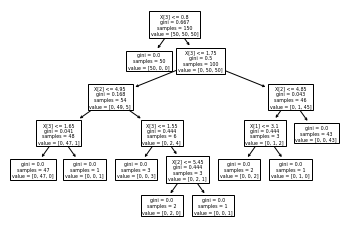

In [7]:
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
X, y = iris.data, iris.target
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [9]:
r = export_text(clf, feature_names=iris['feature_names'])

r

'|--- petal width (cm) <= 0.80\n|   |--- class: 0\n|--- petal width (cm) >  0.80\n|   |--- petal width (cm) <= 1.75\n|   |   |--- petal length (cm) <= 4.95\n|   |   |   |--- petal width (cm) <= 1.65\n|   |   |   |   |--- class: 1\n|   |   |   |--- petal width (cm) >  1.65\n|   |   |   |   |--- class: 2\n|   |   |--- petal length (cm) >  4.95\n|   |   |   |--- petal width (cm) <= 1.55\n|   |   |   |   |--- class: 2\n|   |   |   |--- petal width (cm) >  1.55\n|   |   |   |   |--- petal length (cm) <= 5.45\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- petal length (cm) >  5.45\n|   |   |   |   |   |--- class: 2\n|   |--- petal width (cm) >  1.75\n|   |   |--- petal length (cm) <= 4.85\n|   |   |   |--- sepal width (cm) <= 3.10\n|   |   |   |   |--- class: 2\n|   |   |   |--- sepal width (cm) >  3.10\n|   |   |   |   |--- class: 1\n|   |   |--- petal length (cm) >  4.85\n|   |   |   |--- class: 2\n'

### REGRESSION


### TIPS ON pracical use
- feature가 많으면 오버피팅 경향
- dimensionality reduction 이전에 better features 찾기
- number of samples required to populate the tree doubles for each additional level -> control max_depth
- min_samples_split or min_samples_leaf to ensure that multiple smaples inform every decision in the tree by controlling which splits will be considered
- prevent from being biased toward the classes that are dominant

# 2. 앙상블
- averaging : to build several estimators independently and then to average their pridictions -> variance is reduced
- boosting : built sequentially and one tries to reduce the bias of the combined estimator

In [ ]:
X = [0]